In [1]:
# Импортируем библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

# Скачиваем и читаем файл
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()
display(churn_data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
# Создадим копию
churn_df = churn_data.copy()
# Удалем столбец с номером строки:
churn_df = churn_df.drop(['RowNumber'], axis=1)


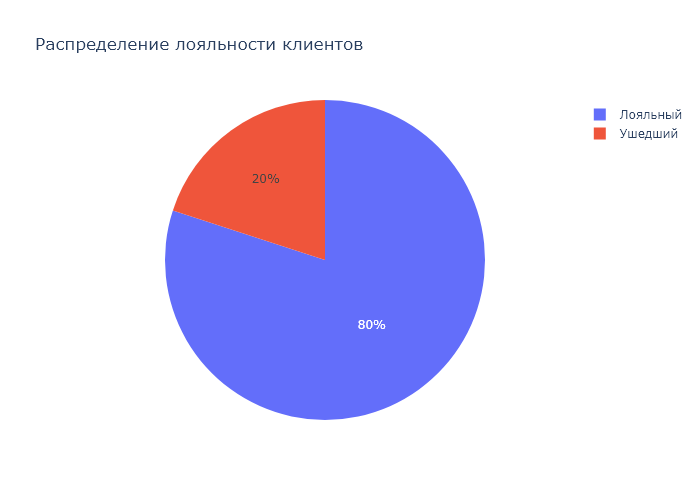

In [6]:
# 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
fig = px.pie(churn_df, values=churn_df['Exited'].index, 
             names=churn_df['Exited'].map({0: 'Лояльный', 1: 'Ушедший'}),
             title='Распределение лояльности клиентов',
)

fig.show("png")

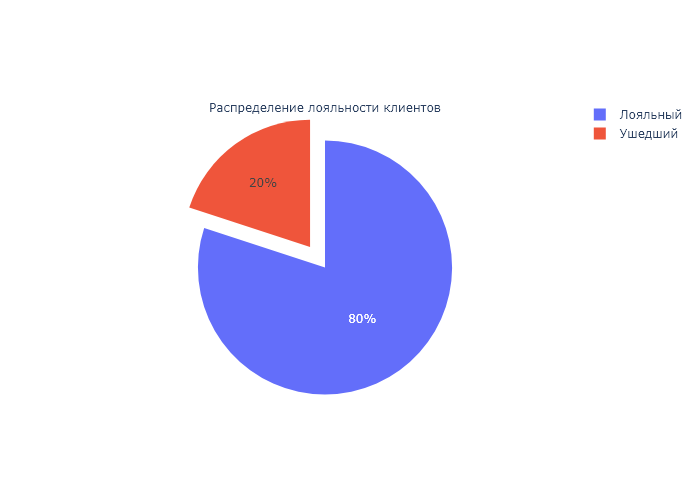

In [7]:
# Импортируем подмодуль, что бы потом выдвинуть сектор
import plotly.graph_objects as go

fig = go.Figure(data=[go.Pie(values=churn_df['Exited'].index, labels=churn_df['Exited'].map({0: 'Лояльный', 1: 'Ушедший'}),
             title='Распределение лояльности клиентов', pull=[0.2, 0])])

fig.show("png")

## Пояснения к графику:

Лояльных клиентов в 4 раза больше чем ушедших.
Каждый пятый клиент уходит из банка.


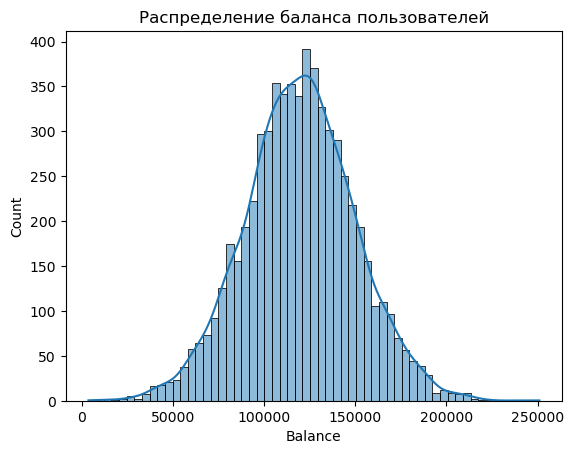

In [8]:
# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
fig, axes = plt.subplots(nrows=1, ncols=1)
mask = churn_df[churn_df['Balance']>2500]
sns.histplot(data=mask, x='Balance', kde=True);
axes.set_title('Распределение баланса пользователей');

## Пояснения к графику "Распределение баланса пользователей":

Наибольшее количество пользователей имеет на балансе от 100 до 150 тысяч. 
Несколько пользователей имеют баланс более 200 тыс. 

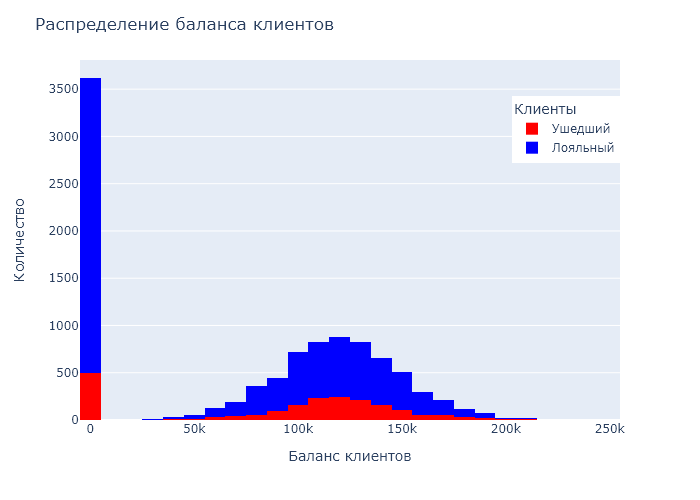

In [12]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
#Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
#Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
label=churn_df['Exited'].map({0: 'Лояльный', 1: 'Ушедший'}) # чтобы в легенде была понятная подпись
fig = px.histogram(churn_df,
                   x = 'Balance',
                   color = label, # цвет по принадлежности клиента
                   nbins=50,  color_discrete_sequence=["red","blue"],
                   barmode = 'stack', # каждый столбец класса будет разделен по признаку Exited
)
 
# применим метод .update_layout для подписи данных
fig.update_layout(
    title_text = 'Распределение баланса клиентов', # заголовок
    xaxis_title_text = 'Баланс клиентов', # подпись к оси x
    yaxis_title_text = 'Количество', # подпись к оси y
    
    legend=dict(x=.9, y=.9, xanchor="center"),
    legend_title_text = 'Клиенты',       
)

fig.show("png")

## Пояснение к графику "Распределение баланса лояльных и ушедших клиентов"

Распределение балансов ушедших и лояльных клиентов имеет похожий вид.
Из 10 тыс клиентов банка порядка 30% клиентов имеет нулевой остаток. 
Среди клиентов с ненулевым остатком наблюдается сохраняющаяся пропорция по оттоку.
Из банка уходят клиенты как с нулевым остатком, так и состоятельные.

Минимальный возраст: 18
Максимальный возраст: 92
Медиана: 37.0
мода: 0    37
Name: Age, dtype: int64


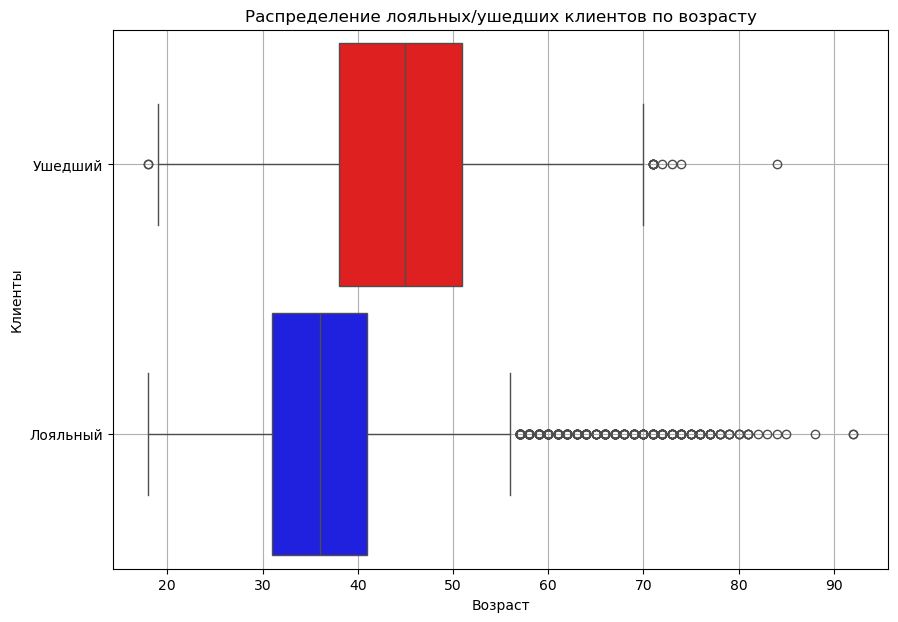

In [13]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
#На какую возрастную категорию клиентов стоит обратить внимание банку?

# определим возрастные рамки клиантов банка
print('Минимальный возраст:',churn_df['Age'].min())
print('Максимальный возраст:',churn_df['Age'].max())
print('Медиана:',churn_df['Age'].median())
print('мода:',churn_df['Age'].mode())

my_colors = ["red","blue"] #задам цвет 
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_df,
    y=label,
    legend=False, hue=label,
    x='Age',
    orient='h', 
    palette=my_colors,
    width=0.9,
)

boxplot.set_title('Распределение лояльных/ушедших клиентов по возрасту');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Клиенты');

boxplot.grid()

## Пояснение к графику 'Распределение лояльных/ушедших клиентов по возрасту'
Основной возраст оттока клиентов 40-50 лет. Возраст, когда люди в стабильном заработке и начинают задумываться о пенсионном возврасте.
Возможно банку надо разработать программу по удержанию клиентов со стабильным заработком и заинтересовать программами с расчётом на пенсионный возвраст.

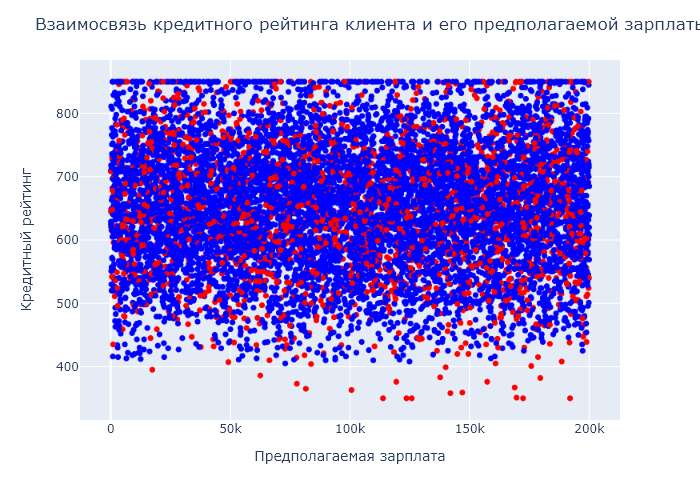

In [14]:
#9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
#Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
#Если не видите явной взаимосвязи, укажите это.

#строим график

label=churn_df['Exited'].map({0: 'Лояльный', 1: 'Ушедший'})
fig = px.scatter(
    churn_df, 
    x = 'EstimatedSalary', 
    y = 'CreditScore', 
    color = 'Exited',
    color_continuous_scale=['blue', 'red'], # задаю цвета в соответствии с остальными графиками
)

fig.update_layout(
    title_text = 'Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', # заголовок
    xaxis_title_text = 'Предполагаемая зарплата', # подпись к оси x
    yaxis_title_text = 'Кредитный рейтинг', # подпись к оси y 
    
)

fig.update_coloraxes(showscale=False) 
#отображаем график
fig.show("png")


## Пояснение к графику 'Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты'
Отток клиентов происходит при разных уровнях зарплаты и кредитного рейтинга.
Связи между оттоком клиентов и их кредитным рейтингом не наблюдается.

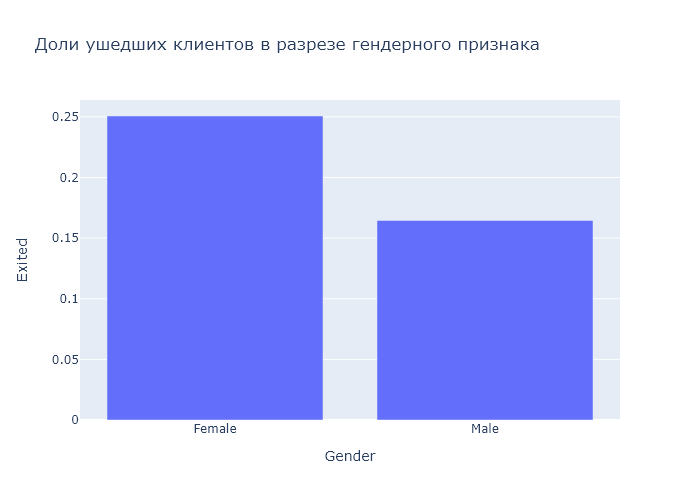

In [15]:
#9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
#Процент ушедших клиентов в каждой группе можно рассчитать как среднее по столбцу Exited (так как 1 — это ушедшие клиенты, 
# а 0 — лояльные, среднее арифметическое по столбцу обозначает долю ушедших клиентов).
grouped_gender = churn_df.groupby(['Gender'])['Exited'].mean()

fig = px.bar(
    data_frame=grouped_gender,
    x=grouped_gender.index,
    y='Exited',
    height=500, #высота
    width=700, #ширина
    title='Доли ушедших клиентов в разрезе гендерного признака'
)

fig.show("png")

## Пояснение к графику 'Доли ушедших клиентов в разрезе гендерного признака'
Чаще уходят женщины. уходят 25% женщин и только 16 процентов мужчин.
Почему так? Возможно надо провести более глубокий анализ и проверить, какой % ушедших женщин возможно домохозяйки и не имееют самостоятельного дохода. 

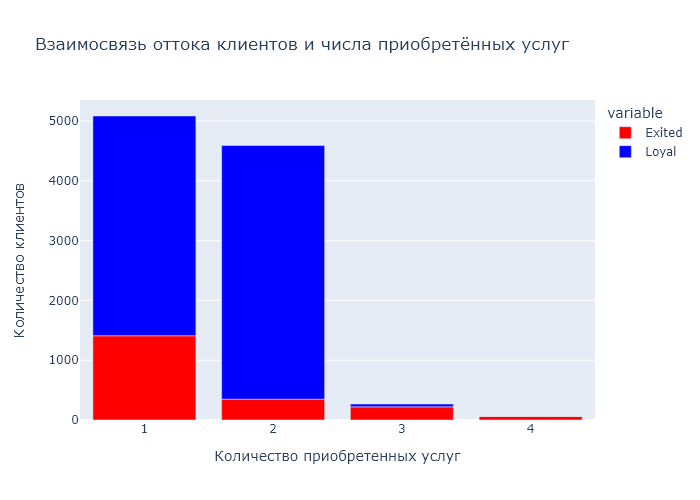

In [16]:
#9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
#Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.
churn_df['Loyal'] = 1 - churn_df['Exited']
grouped_exit = churn_df.groupby(['NumOfProducts'])[['Exited', 'Loyal']].sum()

fig = px.bar(
    data_frame=grouped_exit,
    x=grouped_exit.index,
    y=['Exited', 'Loyal'],
    color_discrete_sequence=["red","blue"],
    width=700, #ширина
    title='Взаимосвязь оттока клиентов и числа приобретённых услуг'
)
fig.update_layout(
    xaxis_title_text = 'Количество приобретенных услуг', # подпись к оси x
    yaxis_title_text = 'Количество клиентов', # подпись к оси y    
)
fig.show("png")

## Пояснение к графику 'Взаимосвязь оттока клиентов и числа приобретённых услуг'
Уходит меньше всего клиентов с количеством услуг 2. Основное количество приобретает по одной услуге, соответственно и количество клиентов в абсолютном показателе с одной услугой большое. 
В относительных показателях доля ушедших клиентов с количеством услуг 3 и 4 высоко. 
Сожно предположить, что клиентам не интересны предлагаемые услуги. Тут можно проанализировать, какие именно услуги инетерсны клиентам и влияют на их лояльность, а какие провоцируют отток клиентов. 

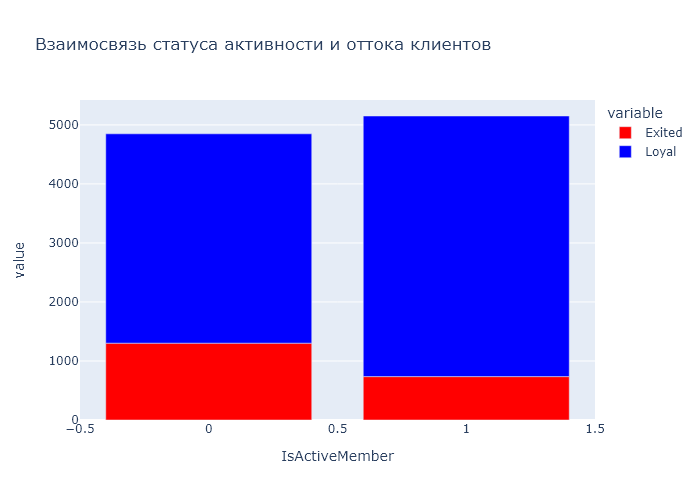

In [17]:
#9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
#Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

grouped = churn_df.groupby(['IsActiveMember'])[['Exited', 'Loyal']].sum()

fig = px.bar(
    data_frame=grouped,
    x=grouped.index,
    y=['Exited', 'Loyal'],
    color_discrete_sequence=["red","blue"],
    width=700, #ширина
    title='Взаимосвязь статуса активности и оттока клиентов'
)

fig.show("png")

## Пояснение к графику 'Взаимосвязь статуса активности и оттока клиентов'
Отток клиентов наблюдается как среди активных, так и не активных. Среди неактивных отток выше. 
Банку можно разработать программы по начислению % на остаток по счету, возможно гибкую систему кэшбека за оплату картой. 

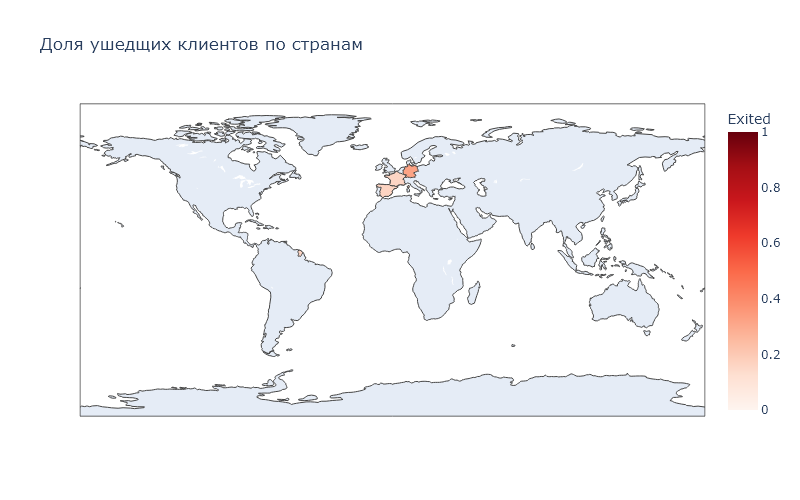

In [18]:
#9.9. В какой стране доля ушедших клиентов больше? 
#Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

# нахожу среднее по странам 
churn_country = churn_df.groupby(['Geography'])['Exited'].mean()

fig = px.choropleth(
    data_frame=churn_country, #DataFrame
    locations=churn_country.index, #столбец с локациями
    locationmode = 'country names', #режим сопоставления локаций с базой Plotly
    color='Exited', #от чего зависит цвет
    range_color=[0, 1], #диапазон цвета, доли в диапазоне
    title='Доля ушедщих клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show("png")

## Пояснение к графику 'Доля ушедщих клиентов по странам'
Банк имеет клиентов в 3 странах: Испания, Франция, Германия.
В Германии отток в 2 раза выше, чем в двух других. Возможно в Германии есть банк, предлагающий более выгодное размещение средств. Можно проанализировать, какие услуги предлагают конкуренты в Германии. Но тут опять же мы рассматриваем относительные показатели, а в абсолютных, какое количество клиентов пользуется услугами, какое уходит. Какую долю занимают клиенты Германии от общего количетсва клиентов банка. В зависимости от этого можно понять, насколько интересно захватывать рынок в Германии.

In [20]:
#9.10. Переведите числовой признак CreditScore в категориальный. 
#Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
#Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)

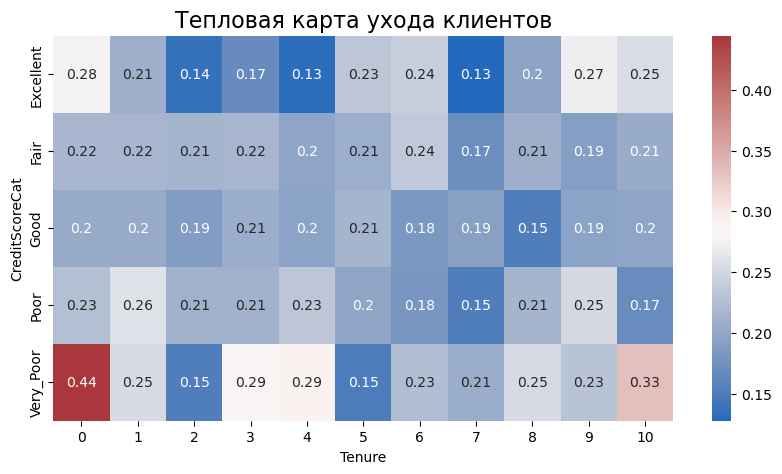

In [21]:
#Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), 
#а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). 
#В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
pivot = churn_df.pivot_table(values ='Exited', index='CreditScoreCat', columns='Tenure', aggfunc='mean')

#На основе полученной сводной таблицы постройте тепловую карту с аннотацией. 
#Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='vlag', annot=True, fmt='.2g')
heatmap.set_title('Тепловая карта ухода клиентов', fontsize=16);


## Пояснение к графику 'Тепловая карта ухода клиентов'
В основном уходят клиенты из категории 'Очень бедные' в течении первого года. Но классификация проведена в зависимости от того, какие кредиты брал клиент,  т.е. о его достатке это не говорит. И высокий отток в этой же группе среди клиентов с кредитной историей более 10 ле.
Возможно надо пересмореть систему кредитования, сделать какие-то бонусные предложения для первого кредита в банке и на кредиты, если пользуешься продуктами более 10 лет.